<a href="https://colab.research.google.com/github/aragan11/BME3053C-Spring-2025/blob/main/Homework_7_aragan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks

In [3]:
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse


    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)


    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)


    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise


    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander


    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference


    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]


    return ecg_data


ecg_data = generate_ecg_data(10, 250)
def generate_ecg_data(duration, sampling_rate=250):
    def generate_ecg_pulse(duration, sampling_rate):
        t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
        # P wave
        p_wave = 0.15 * np.sin(2 * np.pi * 1.5 * t) * np.exp(-((t - 0.1) ** 2) / 0.005)
        # QRS complex
        qrs_complex = np.zeros_like(t)
        qrs_complex[(t > 0.2) & (t < 0.25)] = -0.3
        qrs_complex[(t > 0.25) & (t < 0.3)] = 1.0
        qrs_complex[(t > 0.3) & (t < 0.35)] = -0.2
        # T wave
        t_wave = 0.3 * np.sin(2 * np.pi * 0.75 * (t - 0.45)) * np.exp(-((t - 0.45) ** 2) / 0.015)
        # Combine all components
        pulse = p_wave + qrs_complex + t_wave
        # Add high-frequency noise to the pulse
        high_freq_noise = 0.05 * np.sin(2 * np.pi * 50 * t)
        pulse += high_freq_noise
        return pulse

    # Generate a single ECG pulse
    single_pulse = generate_ecg_pulse(0.8, sampling_rate)

    # Repeat the pulse to create a longer ECG signal
    num_pulses = int(duration / 0.8)
    ecg_data = np.tile(single_pulse, num_pulses)

    # Add more noise to make it more realistic
    noise = np.random.normal(0, 0.05, len(ecg_data))  # Increased noise amplitude
    ecg_data += noise

    # Add baseline wander
    t = np.linspace(0, duration, len(ecg_data), endpoint=False)
    baseline_wander = 0.1 * np.sin(2 * np.pi * 0.1 * t)
    ecg_data += baseline_wander

    # Add power line interference
    power_line_interference = 0.05 * np.sin(2 * np.pi * 60 * t)  # 60 Hz interference
    ecg_data += power_line_interference

    # Ensure the length of ecg_data matches the desired duration
    ecg_data = ecg_data[:int(duration * sampling_rate)]

    return ecg_data

ecg_data = generate_ecg_data(10, 250)

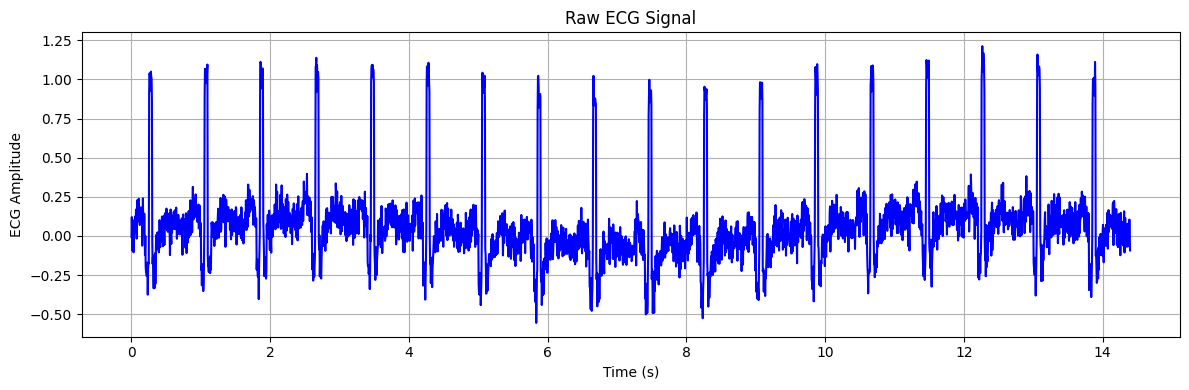

In [8]:
# Part 1: Visualizing the ECG Signal

# Parameters
sampling_rate = 200  # in Hz
duration = 15  # seconds
ecg_data = generate_ecg_data(duration, sampling_rate)

# Time array for x-axis
time = np.arange(len(ecg_data)) / sampling_rate

# Plotting the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(time, ecg_data, color='blue')
plt.title("Raw ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

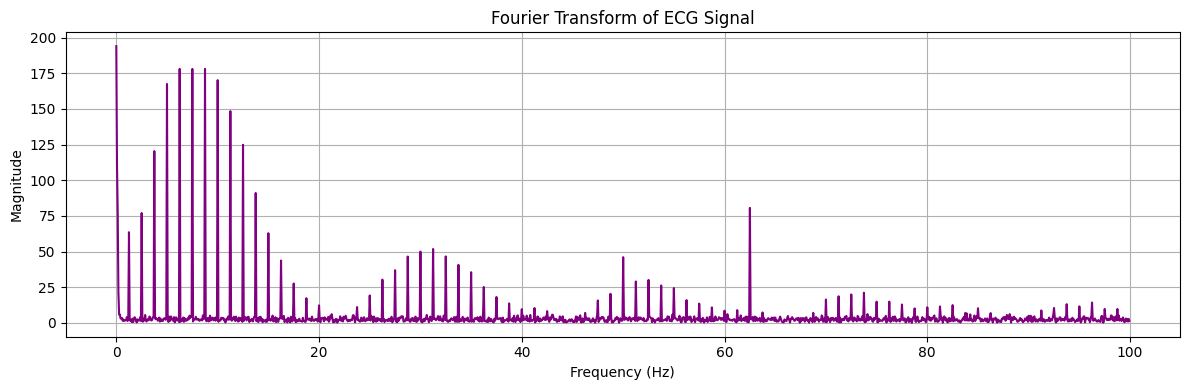

In [10]:
# Part 2: Fourier Transform


ecg_fft = fft(ecg_data)

n = len(ecg_data)
freqs = np.fft.fftfreq(n, d=1/sampling_rate)

positive_freqs = freqs[:n//2]
fft_magnitude = np.abs(ecg_fft[:n//2])

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, fft_magnitude, color='purple')
plt.title("Fourier Transform of ECG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

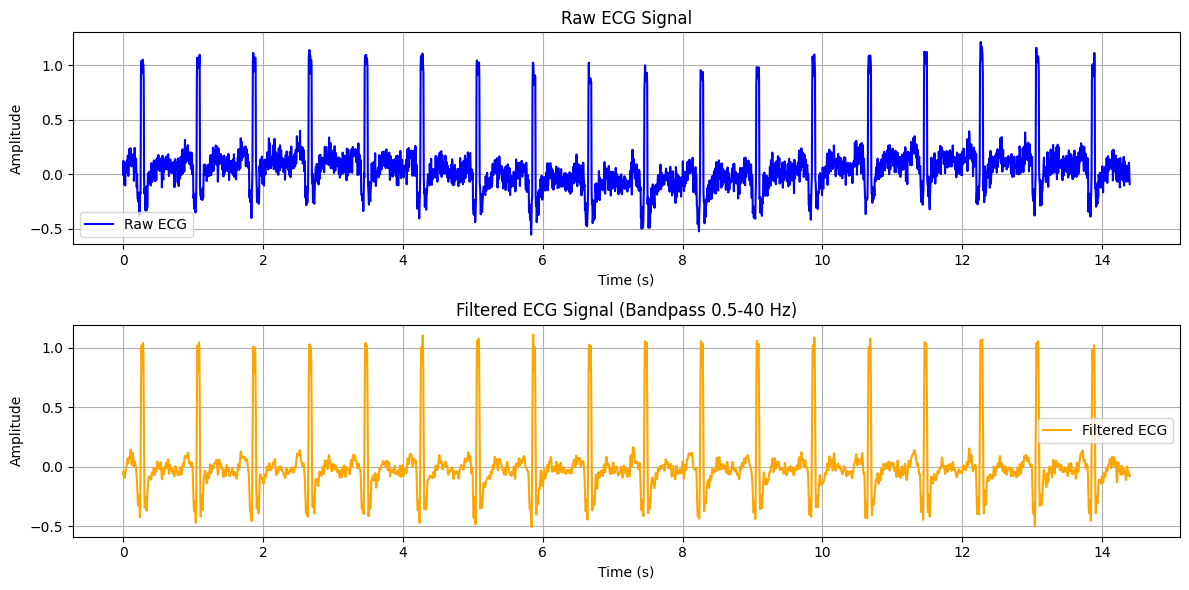

In [18]:
#Part 3: Filtering the ECG Signal


ecg_fft = fft(ecg_data)
n = len(ecg_data)
freqs = np.fft.fftfreq(n, d=1/sampling_rate)

# Range (0.5 Hz to 40 Hz)
low_cutoff = 0.5
high_cutoff = 40
mask = (np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)
ecg_fft_filtered = ecg_fft * mask
ecg_filtered = np.real(ifft(ecg_fft_filtered))
time = np.arange(len(ecg_data)) / sampling_rate

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, ecg_data, label='Raw ECG', color='blue')
plt.title("Raw ECG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, ecg_filtered, label='Filtered ECG', color='orange')
plt.title("Filtered ECG Signal (Bandpass 0.5-40 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
#Part 4: Heart Rate Calculation


from scipy.signal import find_peaks

ecg_fft = fft(ecg_data)
n = len(ecg_data)
freqs = np.fft.fftfreq(n, d=1/sampling_rate)

bandpass_fft = ecg_fft.copy()
bandpass_fft[(np.abs(freqs) < 0.5) | (np.abs(freqs) > 45)] = 0
ecg_filtered = np.real(ifft(bandpass_fft))

peak_indices, peak_properties = find_peaks(ecg_filtered, height=0.5, distance=int(0.4 * sampling_rate))


rr_intervals = np.diff(peak_indices) / sampling_rate
average_rr = np.mean(rr_intervals)
heart_rate_bpm = 60 / average_rr

# Output
print(f"Estimated Heart Rate: {heart_rate_bpm:.2f} BPM")


Estimated Heart Rate: 75.00 BPM


In [ ]:
#Part 5: Summarize Your Findings

#In this assignment, I worked with given ECG data to learn how to process and analyze heart signals. First, I plotted the ECG signal,
#which had some unwanted interference. I then used the Fourier transform to look at the signal’s frequency components and applied
#a filter to remove the noise and keep only the important parts of the signal. After filtering the ECG, I found the R-peaks
#and measured the time between them. By averaging these time intervals, I was able to calculate the heart rate, which was
#75 BPM. This showed me how we can use computers and coding to better understand real-world medical data.